In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Fast Fourier Transform 2D

In [2]:
# Nome do arquivo de imagem
img_name = '2560x1440.jpg'

# Carregando a imagem com PIL
img = Image.open(img_name)

# Convertendo a imagem para escala de cinza
img_gray = img.convert("L")

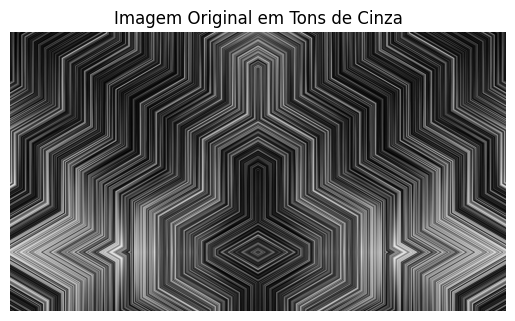

In [3]:
# Plotando a imagem em tons de cinza
plt.imshow(img_gray, cmap="gray")
plt.title("Imagem Original em Tons de Cinza")
plt.axis('off')

plt.show()

In [4]:
# Convertendo a imagem para um array NumPy
img_arr = np.array(img_gray, dtype=float)

In [5]:
# Realizando a Tranformada Rápida de Fourier (FFT)
fft_result = np.fft.fft2(img_arr)

# Centralizando a Transformada de Fourier
fft_shifted = np.fft.fftshift(fft_result)

In [6]:
# Calculando o espectro de magnitude
magnitude_spectrum = 20 * np.log(np.abs(fft_shifted) + 1)

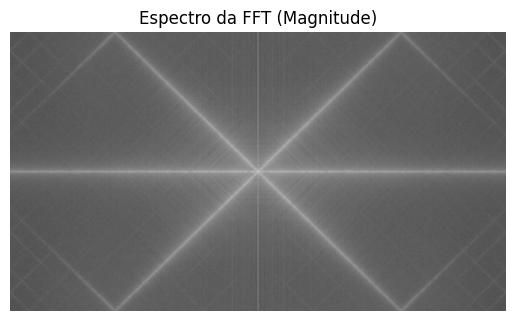

In [7]:
# Plotando o espectro de magnitude
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Espectro da FFT (Magnitude)")
plt.axis('off')

plt.show()

In [ ]:
# Normalizando o espectro de magnitude para salvar como imagem
magnitude_norm = 255 * (magnitude_spectrum / np.max(magnitude_spectrum))
magnitude_uint8 = magnitude_norm.astype(np.uint8)

Image.fromarray(magnitude_uint8).save(img_name.replace('.jpg', '_fft_magnitude.jpg'))

In [9]:
f = np.fft.ifftshift(fft_shifted)

img_rec = np.fft.ifft2(f).real

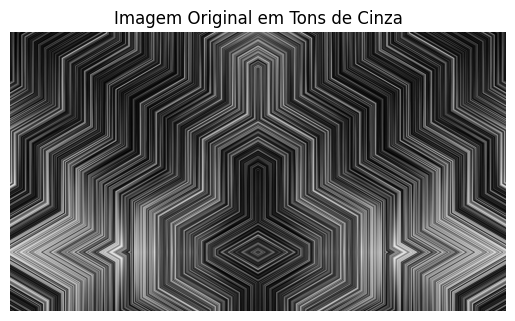

In [10]:
# Plotando a imagem em tons de cinza
plt.imshow(img_rec, cmap="gray")
plt.title("Imagem Original em Tons de Cinza")
plt.axis('off')

plt.show()